In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
#3.1 (I)
# Read the CSV file
disney_movies_df = pd.read_csv("/kaggle/input/walt-disney-movies-dataset/walt_disney_movies.csv")

# Display the first few rows of the DataFrame to verify it's loaded correctly
disney_movies_df.head()

,Unnamed: 0,title,Production company,Country,Language,Running time,Budget,Box office,Release date,imdb,metascore,rotten_tomatoes
0,0,Academy Award Review of,Walt Disney Productions,United States,English,41.0,1490000.0,4.547200e+01,1937-05-19,7.2,95.0,73%
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,United States,English,83.0,1490000.0,4.180000e+08,1937-12-21,7.6,95.0,73%
2,2,Pinocchio,Walt Disney Productions,United States,English,88.0,2600000.0,1.640000e+08,1940-02-07,7.4,99.0,73%
3,3,Fantasia,Walt Disney Productions,United States,English,126.0,2280000.0,8.330000e+07,1940-11-13,7.7,96.0,95%
4,4,The Reluctant Dragon,Walt Disney Productions,United States,English,74.0,600000.0,9.600000e+05,1941-06-20,6.9,96.0,68%


In [6]:
#3.1 (II)

# Columns to be removed
columns_to_drop = ['title', 'Production company', 'rotten_tomatoes', 'Country', 'Language', 'Release date']

# Drop the specified columns
disney_movies_df = disney_movies_df.drop(columns=columns_to_drop, axis=1)

# Display the first few rows to verify columns are removed
disney_movies_df.head()


,Unnamed: 0,Running time,Budget,Box office,imdb,metascore
0,0,41.0,1490000.0,4.547200e+01,7.2,95.0
1,1,83.0,1490000.0,4.180000e+08,7.6,95.0
2,2,88.0,2600000.0,1.640000e+08,7.4,99.0
3,3,126.0,2280000.0,8.330000e+07,7.7,96.0
4,4,74.0,600000.0,9.600000e+05,6.9,96.0


In [7]:
#3.1 (III)

# Convert 'imdb' column to numeric, coercing errors to NaN
disney_movies_df['imdb'] = pd.to_numeric(disney_movies_df['imdb'], errors='coerce')

# Check the data types of the columns to verify the conversion
disney_movies_df.dtypes


Unnamed: 0        int64
Running time    float64
Budget          float64
Box office      float64
imdb            float64
metascore       float64
dtype: object

In [8]:
#3.1 (IV)

# Assuming disney_movies_df is your DataFrame

# Convert categorical variables to dummy variables
disney_movies_df_encoded = pd.get_dummies(disney_movies_df, drop_first=True)

# Display the first few rows to verify the transformation
disney_movies_df_encoded.head()


,Unnamed: 0,Running time,Budget,Box office,imdb,metascore
0,0,41.0,1490000.0,4.547200e+01,7.2,95.0
1,1,83.0,1490000.0,4.180000e+08,7.6,95.0
2,2,88.0,2600000.0,1.640000e+08,7.4,99.0
3,3,126.0,2280000.0,8.330000e+07,7.7,96.0
4,4,74.0,600000.0,9.600000e+05,6.9,96.0


In [11]:
# Print the column names of the DataFrame
print(disney_movies_df.columns)


Index(['Unnamed: 0', 'Running time', 'Budget', 'Box office', 'imdb',
       'metascore'],
      dtype='object')


In [15]:
#3.2 (I)

from sklearn.model_selection import train_test_split

# Use the correct case for the column name based on your DataFrame's output
X = disney_movies_df.drop('imdb', axis=1)  # Correct column name
y = disney_movies_df['imdb']  # Correct column name

# Splitting the data into training and testing sets at a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





In [16]:
#3.2 (II)

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)


# Make predictions using the test data
linear_predictions = linear_model.predict(X_test)



from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, linear_predictions)

# Calculate the R^2 score
r2 = r2_score(y_test, linear_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.4610325112960129
R^2 Score: 0.4428981209454257


In [17]:
#3.2 (III)


from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
random_forest_model.fit(X_train, y_train)


# Make predictions using the test data
random_forest_predictions = random_forest_model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

# Calculate the R^2 score
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print(f"Random Forest Regression Mean Squared Error (MSE): {random_forest_mse}")
print(f"Random Forest Regression R^2 Score: {random_forest_r2}")


Random Forest Regression Mean Squared Error (MSE): 0.49805214067164194
Random Forest Regression R^2 Score: 0.39816438833057954


In [18]:
#3.2 (IV)

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
random_forest_model.fit(X_train, y_train)


# Make predictions using the test data
random_forest_predictions = random_forest_model.predict(X_test)


# Calculate the Mean Squared Error (MSE) and R^2 score for the Random Forest model
rf_mse = mean_squared_error(y_test, random_forest_predictions)
rf_r2 = r2_score(y_test, random_forest_predictions)

print(f"Random Forest Regression MSE: {rf_mse}")
print(f"Random Forest Regression R^2 Score: {rf_r2}")


Random Forest Regression MSE: 0.49805214067164194
Random Forest Regression R^2 Score: 0.39816438833057954


**Compare and Select the Best-suited Model**

With the evaluation results of both models in hand, we can now compare their performance based on the MSE and R^2 scores. The model with the lower MSE and the higher R^2 score generally indicates better performance.

*MSE (Mean Squared Error):* A lower MSE value indicates that the model's predictions are closer to the actual values, which signifies better performance.

*R^2 Score:* The R^2 score measures how well the regression predictions approximate the real data points. An R^2 of 1 indicates that the regression predictions perfectly fit the data.

**Decision Criteria**

If one model outperforms the other on both metrics, it is clearly the better choice.
If the models excel in different metrics (one has a lower MSE, while the other has a higher R^2), we'll need to consider the context of your application to decide which metric is more important for our needs.

Lower MSE is crucial when you need to minimize the error magnitude in our predictions.
Higher R^2 is important when we want to explain a higher proportion of variance in our dependent variable by the model.


**Best suited model accordings to this scenario: **

If my dataset is complex, with non-linear relationships and I prioritize prediction accuracy over model interpretability, **Random Forest Regression** could be the best choice for future development.

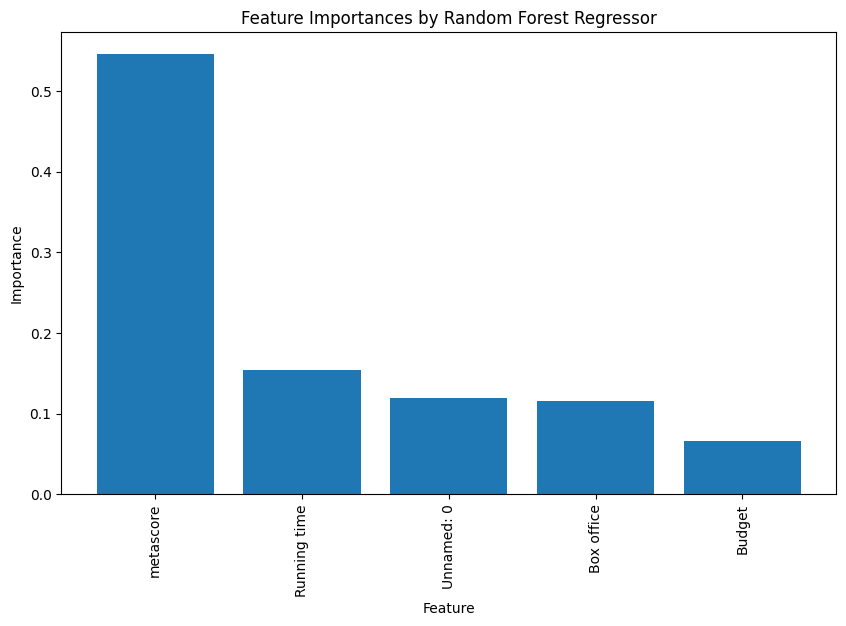

In [19]:
#3.2 (V)

import matplotlib.pyplot as plt
import numpy as np

# Assuming `random_forest_model` is your trained Random Forest Regressor
feature_importances = random_forest_model.feature_importances_
feature_names = X.columns

# Sorting the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Random Forest Regressor")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
